## Explode
- explode('column to be exploded')
- groupby(['columns/column to be grouped'])
- names the un-named column **reset_index(name='give the name')**
- **plt.gca().invert_yaxis()** this helps arrange the y axis from biggest to smallest and vice verser
- **df['date column'].dt.strftime('%b')** this makes a column of month names 
- **'%b'** is for jan, **'%B'** is for January.
- **pd.to_datetime(df['month name'], format='%b').dt.month** this helps to arrange the month names in the right order. 
- format=*'has to be the way it was formate while making the month name column'*




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast

In [3]:
df = pd.read_csv('C:/Users/Ian/Desktop/panda ex/newdata_jobs4.csv')
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [4]:
df['job_skills'] = (df['job_skills']
                    .apply(lambda skill_list: ast.literal_eval(skill_list)
                            if pd.notna(skill_list)
                              else skill_list))

In [5]:
# explode function is mostly used on columns with more that one characters. this helps to
# - the characters to be stand alone characters.
df_exploded = df.explode('job_skills')

<Axes: xlabel='job_skills'>

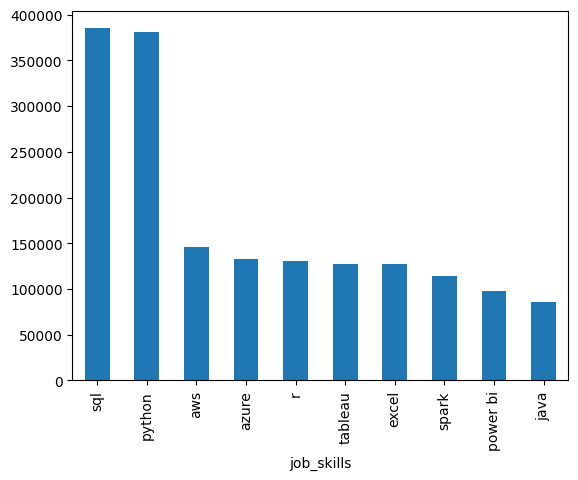

In [6]:
df_exploded['job_skills'].value_counts().head(10).plot(kind='bar')

In [7]:

skill_exp = df_exploded.groupby(['job_title_short','job_skills']).size()
skill_exp

job_title_short    job_skills
Business Analyst   airflow        318
                   airtable        17
                   alteryx       1078
                   angular         87
                   ansible        120
                                 ... 
Software Engineer  wrike            4
                   wsl             13
                   xamarin         35
                   yarn           145
                   zoom           229
Length: 2256, dtype: int64

In [8]:
df_skill_exp = skill_exp.reset_index(name='skill_count').sort_values(by='skill_count', ascending=False)
df_skill_exp

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
462,Data Analyst,chainer,1
432,Cloud Engineer,wrike,1
410,Cloud Engineer,theano,1
24,Business Analyst,chainer,1


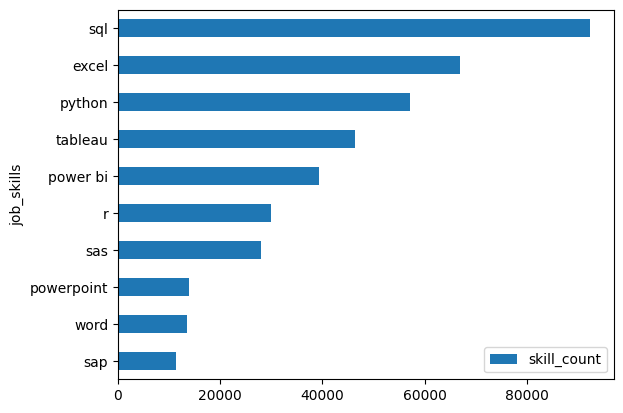

In [9]:
# plt.gca().invert_yaxis() this helps arrange the y axis from biggest to smallest and vice verser
job_name = 'Data Analyst'
top_skills = 10

graph = (df_skill_exp[df_skill_exp['job_title_short'] == job_name]
         .head(top_skills).plot(kind='barh',x = 'job_skills', y='skill_count'))

plt.gca().invert_yaxis()

## exercise
- plot top5 skills for data analysis per month

In [11]:
df_exe = df.copy()

In [94]:
job_title = 'Data Analyst'
df_exe = df_exe[df_exe['job_title_short'] == job_title]
df_exe['job_posted_month'] = df_exe['job_posted_date'].dt.strftime('%b')

In [36]:
df_exploode = df_exe.explode('job_skills')

In [92]:
skill_list = df_exploode['job_skills'].value_counts().sort_values(ascending=False).head().index.tolist()
pivot_skill = df_exploode.pivot_table(index='job_posted_month', columns='job_skills', aggfunc='size', fill_value=0)
pivot_skill.reset_index(inplace=True)
pivot_skill['job_month_no']= pd.to_datetime(pivot_skill['job_posted_month'], format='%b').dt.month
pivot_skill.set_index('job_month_no', inplace=True)
pivot_skill.sort_index(inplace=True)
pivot_skill.set_index('job_posted_month', inplace=True)
pivot_skill


job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,197,17,551,63,2,20,2,1,29,34,...,17,228,6,1778,0,11,6,0,9,95
Feb,169,2,448,49,0,14,1,4,27,13,...,9,202,6,1235,4,2,5,0,4,41
Mar,181,4,442,34,0,23,6,1,17,13,...,8,194,8,1203,1,1,3,1,5,45
Apr,155,4,413,22,0,11,8,9,9,15,...,9,185,14,1177,8,2,1,0,6,26
May,128,8,310,30,0,19,9,2,8,21,...,11,122,3,957,3,4,0,0,7,18
Jun,164,14,393,29,0,14,9,4,16,16,...,8,157,14,1237,6,6,0,0,11,34
Jul,207,4,366,15,0,8,5,8,19,12,...,5,161,11,1069,0,3,0,0,6,38
Aug,197,3,413,21,0,12,10,3,13,12,...,9,184,11,1298,0,1,0,0,11,41
Sep,118,4,317,21,0,14,3,10,12,10,...,4,150,8,945,0,1,0,0,5,25


Text(0.5, 1.0, 'job postings of Data Analyst top skills')

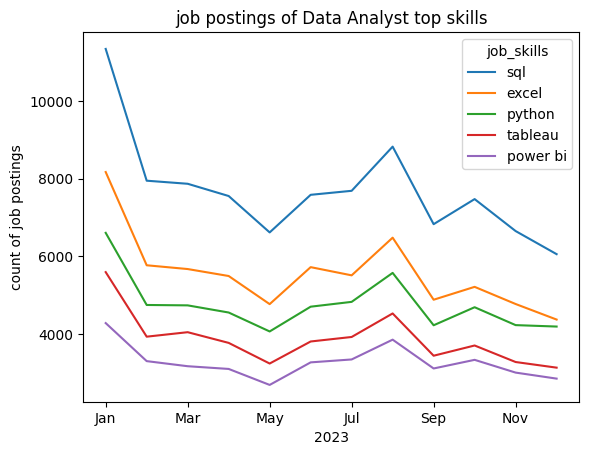

In [93]:
pivot_skill[skill_list].plot(kind='line')
plt.xlabel('2023')
plt.ylabel('count of job postings')
plt.title(f'job postings of {job_title} top skills')